<a href="https://colab.research.google.com/github/prathameshk30/Pytorch-Algo-Intro/blob/main/Reinforcement__Learning_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
## importing libraries

import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

Q.1 ) Consider a k-armed bandit problem with k = 4 actions, denoted as 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using ε-greedy action selection, sample-average action-value estimates, and initial estimates of Q₁(a) = 0, for all a. Suppose the initial sequence of actions and rewards is A₁ = 1, R₁ = 1, A₂ = 2, R₂ = 1, A₃ = 2, R₃ = 2, A₄ = 2, R₄ = 2, A₅ = 3, R₅ = 0. On some of these time steps the ε case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?

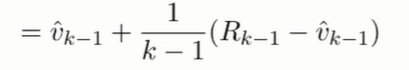

In [31]:
class Bandit_problem(object):
  def __init__(self, Mean_values_of_events: dict[int], epsilon: int, total_steps: int):
    '''
    Mean_values_of_events is the list of mean values of the events (scores of player, mean return of investment)
    epsilon is the probability value to be used for the selecteing the non greedy action
    total steps for the test to run

    epsilon should be a value between 0 to 1
    '''
    # Define the values
    self.Mean_values_of_events= [keys for keys in Mean_values_of_events.keys()]
    self.standard_Deviation_of_events= [values for values in Mean_values_of_events.values()]
    self.epsilon= epsilon
    self.total_steps= total_steps

    # number of the arms
    self.armNumber= np.size(self.Mean_values_of_events)

    # vector to track to the how many times a arm is selected
    self.armTrack= np.zeros(self.armNumber)

    # vector to store the mean rewards of the arm
    self.armMeanReward= np.zeros(self.armNumber)

    # current step
    self.currentStep= 0

    # current reward
    self.currentReward= 0

    # mean reward
    self.meanReward=np.zeros(self.total_steps+1)

  '''
  Take action basedon eplison - greedy approach
  '''

  def takeAction(self):
    '''
    in this function we select the the course of our action based the randomly generated probability value,
    if the probability value is less than the epsilon value then we randomly select the arm,
    else we select the arm that gives the max reward
    '''
    probabilityValue=np.random.rand()

    if (self.currentStep==0) or (probabilityValue < self.epsilon):
      selectedArmIndex=np.random.choice(self.armNumber)

    elif (probabilityValue > self.epsilon):
      selectedArmIndex= np.argmax(self.armMeanReward)

    # increase the step value
    self.currentStep= self.currentStep + 1

    # record of which arm is selected
    self.armTrack[selectedArmIndex]= self.armTrack[selectedArmIndex] + 1

    # generate the values of reward for the selected action fromm the normal distribution of the reward
    self.currentReward=np.random.normal(self.Mean_values_of_events[selectedArmIndex], self.standard_Deviation_of_events[selectedArmIndex])

    # update the reward to current arm mean
    self.armMeanReward[selectedArmIndex]=  self.Mean_values_of_events[selectedArmIndex] + (1/(self.armTrack[selectedArmIndex])*(self.currentReward- self.Mean_values_of_events[selectedArmIndex]))

    # update the mean reward
    self.meanReward[self.currentStep]=self.meanReward[self.currentStep-1]+(1/(self.currentStep))*(self.currentReward-self.meanReward[self.currentStep-1])

  # run the simulation
  def playGame(self):
    for i in range(self.total_steps):
        self.takeAction()

In [46]:
# Define the totaal steps
total_steps=500

# Define the epsilon
epsilon= 0.3


bandit_problems=Bandit_problem({4:2,5:2,8:6}, epsilon=epsilon, total_steps=total_steps)
bandit_problems.playGame()

In [47]:
epsilonMeanReward_1=bandit_problems.meanReward

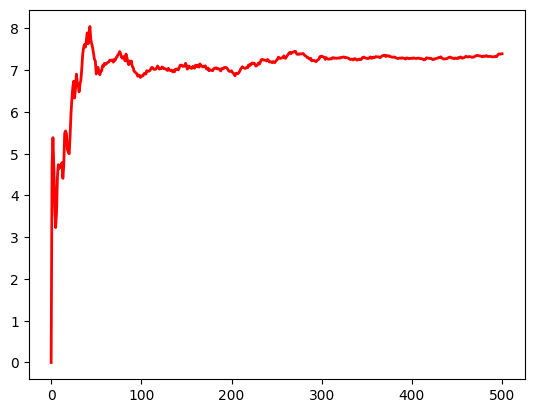

In [48]:
plt.plot(np.arange(total_steps+1),epsilonMeanReward_1,linewidth=2, color='r', label='epsilon =0')